In [2]:
import pandas as pd

In [3]:
hr=pd.read_csv('HR_Cost.csv')
hr

,Cost
0,202
1,208
2,222
3,219
4,211
...,...
139,696
140,598
141,551
142,480


In [4]:
hr['forecasted_Cost']=hr.Cost.rolling(5).mean()
hr

,Cost,forecasted_Cost
0,202,NaN
1,208,NaN
2,222,NaN
3,219,NaN
4,211,212.4
...,...,...
139,696,629.2
140,598,638.6
141,551,636.4
142,480,607.4


In [5]:
hr.loc[0]=[202,212.4]
hr

,Cost,forecasted_Cost
0,202,212.4
1,208,NaN
2,222,NaN
3,219,NaN
4,211,212.4
...,...,...
139,696,629.2
140,598,638.6
141,551,636.4
142,480,607.4


In [6]:
hr=hr.rename(columns={'Cost': 'Costs'})
hr

,Costs,forecasted_Cost
0,202,212.4
1,208,NaN
2,222,NaN
3,219,NaN
4,211,212.4
...,...,...
139,696,629.2
140,598,638.6
141,551,636.4
142,480,607.4


In [7]:
import matplotlib.pyplot as plt

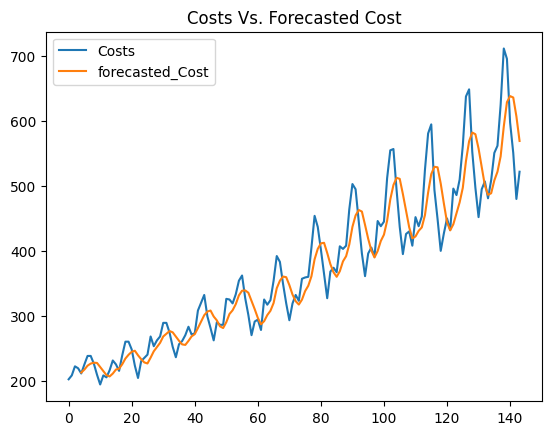

In [8]:
hr.plot(y=['Costs','forecasted_Cost'])
plt.title("Costs Vs. Forecasted Cost")
plt.show()


In [9]:
hr['Yt-Ft'] = hr['Costs'] - hr['forecasted_Cost']
hr

,Costs,forecasted_Cost,Yt-Ft
0,202,212.4,-10.4
1,208,NaN,NaN
2,222,NaN,NaN
3,219,NaN,NaN
4,211,212.4,-1.4
...,...,...,...
139,696,629.2,66.8
140,598,638.6,-40.6
141,551,636.4,-85.4
142,480,607.4,-127.4


In [10]:
hr['|Yt-Ft|'] = hr['Yt-Ft'].abs()
hr

,Costs,forecasted_Cost,Yt-Ft,|Yt-Ft|
0,202,212.4,-10.4,10.4
1,208,NaN,NaN,NaN
2,222,NaN,NaN,NaN
3,219,NaN,NaN,NaN
4,211,212.4,-1.4,1.4
...,...,...,...,...
139,696,629.2,66.8,66.8
140,598,638.6,-40.6,40.6
141,551,636.4,-85.4,85.4
142,480,607.4,-127.4,127.4


In [11]:
hr['|Yt-Ft|/Yt'] = hr['|Yt-Ft|'] / hr['Costs']
hr

,Costs,forecasted_Cost,Yt-Ft,|Yt-Ft|,|Yt-Ft|/Yt
0,202,212.4,-10.4,10.4,0.051485
1,208,NaN,NaN,NaN,NaN
2,222,NaN,NaN,NaN,NaN
3,219,NaN,NaN,NaN,NaN
4,211,212.4,-1.4,1.4,0.006635
...,...,...,...,...,...
139,696,629.2,66.8,66.8,0.095977
140,598,638.6,-40.6,40.6,0.067893
141,551,636.4,-85.4,85.4,0.154991
142,480,607.4,-127.4,127.4,0.265417


In [12]:
hr.loc[:, '|Yt-Ft|'].mean()

31.296453900709214

In [13]:
hr.loc[:, '|Yt-Ft|/Yt'].mean()

0.07822790356704941

In [14]:

m= hr['Yt-Ft']**2
m

0        108.16
1           NaN
2           NaN
3           NaN
4          1.96
         ...   
139     4462.24
140     1648.36
141     7293.16
142    16230.76
143     2246.76
Name: Yt-Ft, Length: 144, dtype: float64

In [15]:
m.mean()#MSE

1756.2297872340425